# Galaxies vs quasars with neural networks.

In [1]:
import numpy as np
import pylab as plt

import sklearn.model_selection
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

C:\Users\utente\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**1)**

- Read in SDSS galaxy color data from `solutions/galaxyquasar.csv`. Create arrays for the $(u-g)$, $(g-r)$, $(r-i)$, and $(i-z)$ colors. Also create an array with the class labels where galaxy=$0$ and quasar=$1$. 


In [2]:
# Here, we import the data in order to get 'names'
data_0 = np.genfromtxt('../solutions/galaxyquasar.csv',delimiter=',',names =True, usecols = (0,1,2,3,4,6),dtype=float)

#Let's take our target(label)
names = data_0.dtype.names
print(names)

('u', 'g', 'r', 'i', 'z', 'z1')


In [3]:
# Here, we import the data in order to get 'names'
data = np.genfromtxt('../solutions/galaxyquasar.csv',delimiter=',', usecols = (0,1,2,3,4,6),dtype=float,skip_header=1)

In [4]:
lab = np.genfromtxt('../solutions/galaxyquasar.csv',delimiter=',', usecols = (5),dtype=str,skip_header=1)
#gq = set(GQ)

y = []

for gq in lab:
    if gq == 'QSO':
        y.append(1)
    else:
        y.append(0)

y = np.array(lab=='QSO',dtype=int)

In [5]:
d = dict(zip(names,data.T))

for diff in ['ug', 'gr', 'ri', 'iz']:
    d[diff]=d[diff[0]]-d[diff[1]] 
d['lab']=lab

X=np.array([d['ug'], d['gr'], d['ri'], d['iz']]).T

**2)**

- Now we're going to fit a neural network classifier. First, scale your data appropriately and do a 30% train/test split.

**3)**

- Now train the classifier. Use one the package among those we've seen. These include Tensorflow via keras, pytorch, and the multilayer perceptron classifier implemented in scikit-learn.

- Start from a network architecture with a single hidden layer with 5 neurons, using the `adam` solver, the `relu` activation function, and a learninig rate of `0.001`. Plot the resulting ROC curve. 

In [6]:
scaler = StandardScaler() 
X_scaler = scaler.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_scaler, y, test_size=0.30,random_state=24)

In [8]:
clf = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(5), alpha=0,learning_rate_init=0.001,max_iter=200)
#activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
#solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’

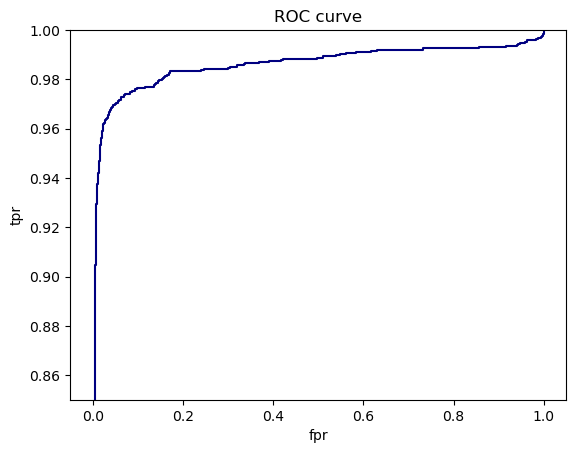

In [9]:
clf.fit(X_train,y_train)
y_prob = clf.predict_proba(X_test) [:,1]
fpr, tpr, thresh = roc_curve(y_test,y_prob)


#ROC curve
plt.plot(fpr,tpr,color='navy')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC curve")
plt.ylim(0.85,1.0)
plt.show()

**4)**

- Now let's optimize the hyperparameters of your network. Explore different hyperparameters and see what fits the data best.  Do your best now to optimize the network architecture. 

In [10]:
grid = [
        {
        'activation' : ['identity', 'logistic', 'tanh', 'relu'],
        'solver' : ['lbfgs', 'sgd', 'adam'],
        'hidden_layer_sizes': (0,10)
        }
       ]

gscv = GridSearchCV(clf,grid, scoring='accuracy', n_jobs=-1)
gscv.fit(X_scaler, y)
gscv.best_params_
best_clf = gscv.best_estimator_

C:\Users\utente\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\utente\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\utente\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 752, in fit
    return self._fit(X, y, incremental=False)
  File "C:\Users\utente\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 386, in _fit
    raise ValueError

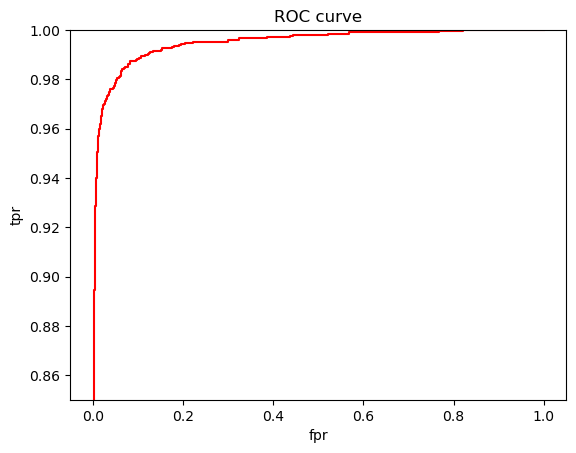

In [11]:
best_clf.fit(X_train,y_train)
y_prob = best_clf.predict_proba(X_test) [:,1]
fpr_best, tpr_best, thresh_best = roc_curve(y_test,y_prob)


#ROC curve
plt.plot(fpr_best,tpr_best,color='red')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC curve")
plt.ylim(0.85,1.0)
plt.show()

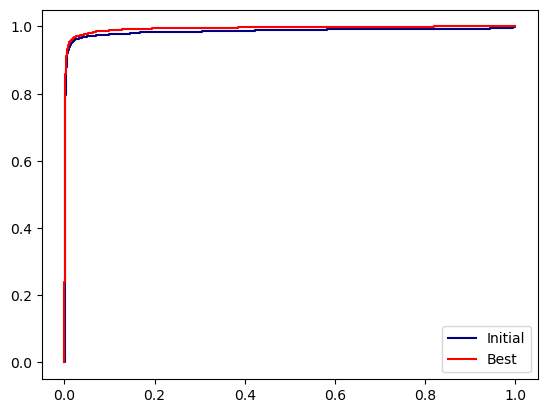

In [12]:
plt.plot(fpr,tpr,color='navy',label='Initial')
plt.plot(fpr_best,tpr_best,color='red',label='Best')
plt.legend()
plt.show()